In [1]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

In [89]:
dataset_path = '../datasets/expert_200_singletask.zarr'
root = zarr.open_group(dataset_path, mode='r')

states = root['data']['state'][:]
cmds = root['data']['cmd'][:]
obj_positions = root['meta']['obj_pos'][:]
goal_positions = root['meta']['goal_pos'][:]
episode_ends = root['meta']['episode_ends'][:]

print(f"Total states: {len(states)}")
print(f"Total episodes: {len(episode_ends)}")
print(f"Episode ends: {episode_ends[:5]}...")

# Build indices like in train.py
indices = []
for i in range(len(episode_ends)):
    start_idx = 0 if i == 0 else episode_ends[i-1]
    end_idx = episode_ends[i]
    for t in range(start_idx, end_idx - 1):
        indices.append(t)
indices = np.array(indices)

state_arr = states[indices]
all_dpos_arr = states[1:] - states[:-1]
dpos_arr = all_dpos_arr[indices]

print(f"\nValid transitions: {len(indices)}")
print(f"dpos_min: {dpos_arr.min(axis=0)}")
print(f"dpos_max: {dpos_arr.max(axis=0)}")


Total states: 104965
Total episodes: 200
Episode ends: [ 526  923 1351 1868 2401]...

Valid transitions: 104765
dpos_min: [-0.00636971 -0.00684559]
dpos_max: [0.00694528 0.00696847]


In [90]:
state_arr[99809-10:99809+100,0]

array([0.3618907 , 0.36102518, 0.36016315, 0.3593046 , 0.35844958,
       0.35759813, 0.35675025, 0.35590595, 0.3550653 , 0.35422826,
       0.3533949 , 0.35256523, 0.35173926, 0.350917  , 0.3500985 ,
       0.34928375, 0.34847277, 0.3476656 , 0.34686226, 0.34606272,
       0.34526703, 0.3444752 , 0.34368727, 0.3429032 , 0.34212303,
       0.34134677, 0.34057444, 0.33980605, 0.33904162, 0.33828115,
       0.33752465, 0.33677214, 0.33602363, 0.3352791 , 0.33453858,
       0.33380207, 0.3330696 , 0.33234116, 0.33161676, 0.3308964 ,
       0.3301801 , 0.32946786, 0.32875967, 0.32805556, 0.3273555 ,
       0.32665953, 0.32596764, 0.32527983, 0.3245961 , 0.32391647,
       0.32324094, 0.3225695 , 0.32190213, 0.32123888, 0.3205797 ,
       0.31992465, 0.31927368, 0.31862682, 0.31798404, 0.31734535,
       0.31671077, 0.31608027, 0.31545386, 0.31483153, 0.31421328,
       0.3135991 , 0.31298903, 0.31238303, 0.31178108, 0.3111832 ,
       0.3105894 , 0.30999964, 0.30941394, 0.3088323 , 0.30825

In [91]:
dpos_arr[99809-10:99809+100,0]

array([-0.00086552, -0.00086203, -0.00085855, -0.00085503, -0.00085145,
       -0.00084788, -0.0008443 , -0.00084066, -0.00083703, -0.00083336,
       -0.00082967, -0.00082597, -0.00082225, -0.00081852, -0.00081474,
       -0.00081098, -0.00080717, -0.00080335, -0.00079954, -0.00079569,
       -0.00079182, -0.00078794, -0.00078407, -0.00078017, -0.00077626,
       -0.00077233, -0.00076839, -0.00076443, -0.00076047, -0.0007565 ,
       -0.00075251, -0.00074852, -0.00074452, -0.00074053, -0.0007365 ,
       -0.00073248, -0.00072843, -0.00072441, -0.00072035, -0.0007163 ,
       -0.00071225, -0.00070819, -0.00070411, -0.00070006, -0.00069597,
       -0.00069189, -0.00068781, -0.00068372, -0.00067964, -0.00067553,
       -0.00067145, -0.00066736, -0.00066325, -0.00065917, -0.00065506,
       -0.00065097, -0.00064686, -0.00064278, -0.00063869, -0.00063458,
       -0.0006305 , -0.00062642, -0.00062233, -0.00061825, -0.00061417,
       -0.00061008, -0.000606  , -0.00060195, -0.00059786, -0.00

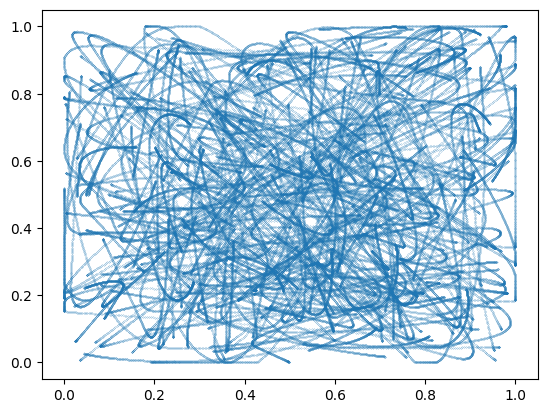

In [93]:
plt.scatter(state_arr[:,0], state_arr[:,1], marker='.', s=0.1)
plt.show()

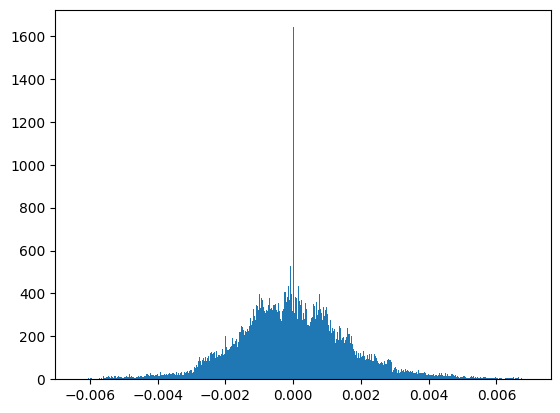

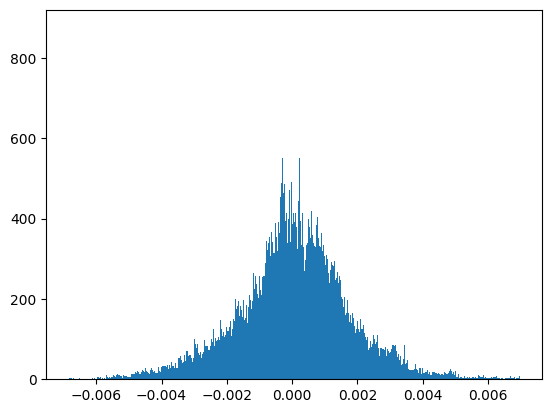

In [96]:
plt.hist(dpos_arr[:,0], bins=1000)
plt.show()
plt.hist(dpos_arr[:,1], bins=1000)
plt.show()